# Compton scattering redistribution function 
### Javier Garcia & Ekaterina Sokolova-Lapa --- July-August 2018

Notes on the topic of the energy redistribution functions for Compton scattering in non-magnetic atmosphere. 

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import const as c
import scatabs as sct
import prered as pr
from timeit import default_timer as timer

There are a number of different redistribution functions used in the literature to describe the probability of photon with initial energy $E_{\mathrm{i}}$ to be scattered off the electron with the final energy $E_{\mathrm{f}}$.

The redistribution functions $R(E_{\mathrm{i}}, E_{\mathrm{f}})$ for Compton scattering were derived the different considerations in the number of works: Sazonov & Sunyaev (2000), Nagirner & Poutanen (1993) and so on. The detailed review on this redistributions functions and their limitations are given by Madej et al. (2017). By integrating $R(E_{\mathrm{i}}, E_{\mathrm{f}})$ over the final photon energies one can obtain the total compton scattering cross section:

$$ \int R(E_{i}, E_{f})dE_{f} = \sigma_{\mathrm{CS}}(E_{i}) \ .$$

It also can be assumed, in the certain ranges of energies and temperatures, that scattered photons are distributed according to a Gaussian profile (Ross & Fabian, 1993) with the proper normalization:

$$ P(E_{i}, E_{f}) = \frac{1}{\sqrt{2\pi}\sigma}\exp\bigg(-\frac{-(E_{f}-E_{c})^{2}}{2\sigma^{2}}\bigg) \ ,$$

with centroid energy $E_{c}$ given by

$$E_{c} = E\bigg( 1  +\frac{4kT}{m_{\mathrm{e}}c^{2}} - \frac{E_{i}}{m_{\mathrm{e}}c^{2}}\bigg)$$

and the standart deviation

$$\sigma = \sigma(E_{i}) = E_{i}\bigg[ \frac{2kT}{m_{\mathrm{e}}c^{2}} + \frac{2}{5}\bigg(\frac{E_{i}}{m_{\mathrm{e}}c^{2}}\bigg) \bigg]^{1/2} \ .$$

Normalization, choisen in the number of works (see Garcia et al. 2013, for example), is that the integral over $R(E_{i}, E_{f})$ gives Klein Nishina cross section $\sigma_{\mathrm{KN}}(E_{i})$:

$$ R(E_{i}, E_{f}) = \frac{P(E_{i}, E_{f})\sigma_{\mathrm{KN}}(E_{i})}{\int P(E_{i}, E_{f})dE_{f}} \ .$$

### Comparison of the redistribution functions 
Now we want to compare the redistribution functions by Sazonov & Sunyaev, 2000 (SS), exact quantum mechanical formula in fully relativistic case (Nagirner & Poutanen 1993) and the gaussian-like probability normalized to the Klein-Nishina cross-section.

To make sure that the routines calculating Sazonov-Sunyaev redistribution function ($\int R_{\mathrm{SS}}(E_{\mathrm{i}}, E_{\mathrm{f}})dE_{\mathrm{f}}$, Eq. 7a-7d from Sazonov & Sunyaev, 2000) and the exact fully relativistic redistribution function ($\int R_{\mathrm{exact}}(E_{\mathrm{i}}, E_{\mathrm{f}})dE_{\mathrm{f}}$, Eq. 3,4 from Nagirner & Poutanen (1993)), work correctly, we reproduce the Fig.2 and Fig.5 from Madej et al. 2017 where authors examine the different redistribution functions. The integration over scattering angles is performed by M$_{\mathrm{n}}$-point Gauss-Legandre quadrature.

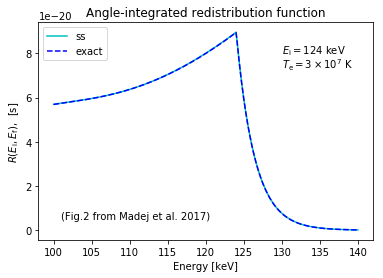

In [2]:
# Fig. 2 from Madej et al. 2017
matplotlib.rcParams['figure.figsize'] = (6, 4)

homega = np.logspace(np.log10(100.), np.log10(140.), 300) * c.keverg
homega_i = 124. * c.keverg
kT = 3.e+7 * c.kerg 
Mn = 500
gn = 100

red_ss = sct.red_angint('ss', homega_i, homega, kT, Mn, gn)
red_exact = sct.red_angint('exact', homega_i, homega, kT, Mn, gn)

plt.plot(homega*c.ergkev, red_ss / c.sigma_Th * c.herg, 'c', label=r'ss')
plt.plot(homega*c.ergkev, red_exact / c.sigma_Th * c.herg, 'b--', label=r'exact')
# the division to c.sigma_Th and multyplication to c.herg ->
# to get the redistribution function in the same units 
# as R(E,E) from Madej et al. 2017: [1/Hz] = [s]
plt.ylabel(r"$R(E_{\mathrm{i}}, E_{\mathrm{f}})$,  [s]")
plt.xlabel(r'Energy [keV]')
plt.text(130., 0.8e-19, r'$E_{\mathrm{i}} = 124$ keV')
plt.text(130., 0.73e-19, r'$T_{\mathrm{e}} = 3 \times 10^{7}$ K')
plt.text(101., 0.05e-19, r'(Fig.2 from Madej et al. 2017)')
plt.title('Angle-integrated redistribution function')
plt.legend(loc='upper left')

plt.savefig('./comptred_tex/figs/rf_mfig2.pdf', dpi=300)

plt.show()

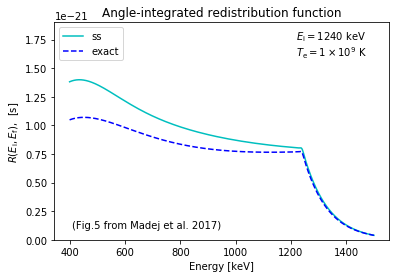

In [3]:
# Fig. 5 from Madej et al. 2017
matplotlib.rcParams['figure.figsize'] = (6, 4)

homega = np.logspace(np.log10(400.), np.log10(1500.), 1000) * c.keverg
homega_i = 1240. * c.keverg
kT = 1.e+9 * c.kerg 
Mn = 200
gn = 100

red_ss = sct.red_angint('ss', homega_i, homega, kT, Mn, gn)
red_exact = sct.red_angint('exact', homega_i, homega, kT, Mn, gn)

plt.plot(homega*c.ergkev, red_ss / c.sigma_Th * c.herg, 'c', label=r'ss')
plt.plot(homega*c.ergkev, red_exact / c.sigma_Th * c.herg, 'b--', label=r'exact')
# the division to c.sigma_Th and multyplication to c.herg ->
# to get the redistribution function in the same units 
# as R(E,E) from Madej et al. 2017: [1/Hz] = [s]
plt.ylabel(r"$R(E_{\mathrm{i}}, E_{\mathrm{f}})$,  [s]")
plt.xlabel(r'Energy [keV]')
plt.text(1220., 1.75e-21, r'$E_{\mathrm{i}} = 1240$ keV')
plt.text(1220., 1.6e-21, r'$T_{\mathrm{e}} = 1 \times 10^{9}$ K')
plt.text(410., 0.1e-21, r'(Fig.5 from Madej et al. 2017)')
plt.title('Angle-integrated redistribution function')
plt.legend(loc='upper left')
plt.ylim(0e-21, 1.9e-21)

plt.savefig('./comptred_tex/figs/rf_mfig5.pdf', dpi=300)

plt.show()

adding the gaussian-like redistribution function to the first plot:

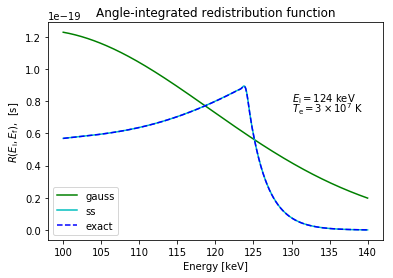

In [7]:
matplotlib.rcParams['figure.figsize'] = (6, 4)

homega = np.logspace(np.log10(100.), np.log10(140.), 300) * c.keverg
homega_i = 124. * c.keverg
kT = 3.e+7 * c.kerg 
Mn = 64

# Sazonov-Sunyaev:
red_e1 = sct.red_angint('ss', homega_i, homega, kT, Mn, gn)
# Gauss:
red_e2 = sct.gaussred(homega_i, homega, kT)
# Exact:
red_e3 = sct.red_angint('exact', homega_i, homega, kT, Mn, gn)

plt.plot(homega*c.ergkev, red_e2/c.sigma_Th*c.herg, 'g', label=r'gauss')
plt.plot(homega*c.ergkev, red_e1/c.sigma_Th*c.herg, 'c', label=r'ss')
plt.plot(homega*c.ergkev, red_e3/c.sigma_Th*c.herg, 'b--', label=r'exact')

plt.ylabel(r"$R(E_{\mathrm{i}}, E_{\mathrm{f}})$,  [s]")
plt.xlabel(r'Energy [keV]')
plt.text(130., 0.8e-19, r'$E_{\mathrm{i}} = 124$ keV')
plt.text(130., 0.73e-19, r'$T_{\mathrm{e}} = 3 \times 10^{7}$ K')
plt.title('Angle-integrated redistribution function')
plt.legend(loc='lower left')

plt.savefig('./comptred_tex/figs/rf_mfig2gauss.pdf', dpi=300)

plt.show()

<b> Note 1: there is a misprint in Madej et al. 2017 in Sazonov-Sunyaev redistribution function: 

$$ \frac{3}{32}\frac{1+\eta^{2}}{1-\eta^{2}}\frac{S^{4}}{\Theta} \Longrightarrow \frac{3}{32}\frac{1+\eta^{2}}{(1-\eta)^{2}}\frac{S^{4}}{\Theta} \ ,$$

using the notations from Madej et al. 2017. In Sazonov & Sunyaev the equation is written down correctly. The check can be performed by integrating the redistribution function over final energies.</b>

<b> Note 2: there is also a misprint in Madej et al. 2017 in Eq. 4 for $\gamma_{*}$ (Lorenz factor) - the lower integral limit:

$$\gamma_{*}=(x-x_{1}+Q+\sqrt{1+2/q)}/2 \Longrightarrow \gamma_{*}=(x-x_{1}+Q\sqrt{1+2/q)}/2$$

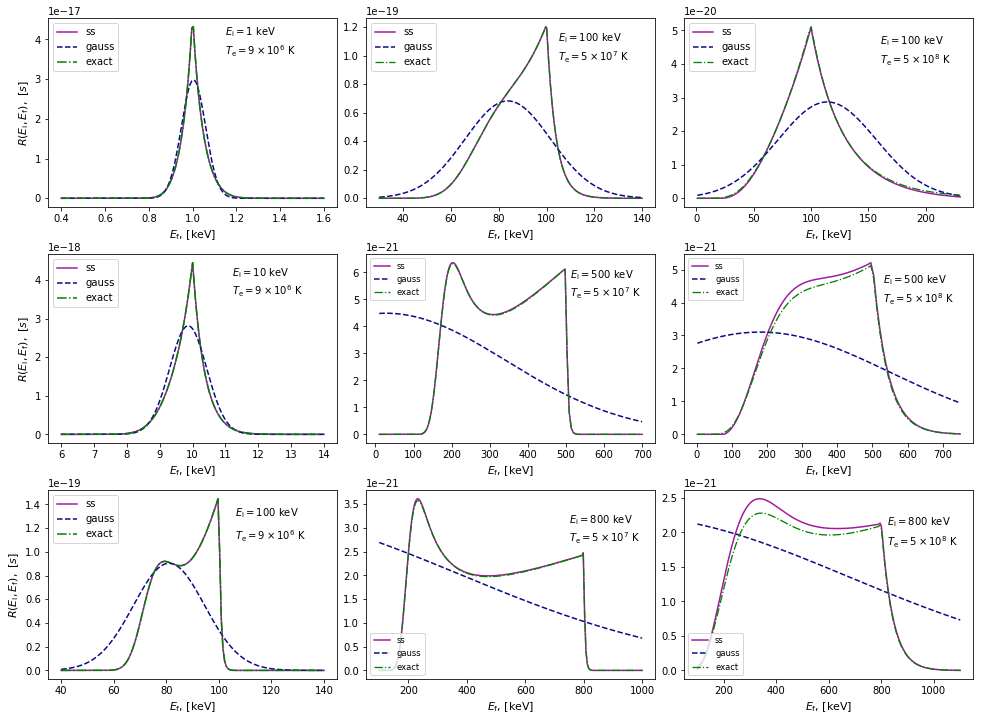

In [8]:
# comparison for wider range of intial photon energies and temperatures:

matplotlib.rcParams['figure.figsize'] = (15.12, 10.2)#(12.6, 8.5)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6) , (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, gridspec_kw={'top': 0.95, 'bottom': 0.05, 'wspace': 0.1, 'hspace': 0.25, 'left':0.05})

homega_i_arr = np.array([1., 10., 100., 500., 800.]) * c.keverg

colors = plt.cm.plasma(np.linspace(0., 0.7, 3))

Mn = 100
gn = 100
#############################################################################
# lower temprature:
kT = 9.e+6 * c.kerg

homega_i = homega_i_arr[0]
homega = np.logspace(np.log10(0.4), np.log10(1.6), 200) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred(homega_i, homega, kT)  / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax1.plot(homega*c.ergkev, red_e1, label=r'ss', color=colors[1])
ax1.plot(homega*c.ergkev, red_e2, label=r'gauss', color=colors[0], linestyle='--')
ax1.plot(homega*c.ergkev, red_e3, label=r'exact', color='g', linestyle='-.')
ax1.set_ylabel(r"$R(E_{\mathrm{i}}, E_{\mathrm{f}}), \ [s]$", fontsize=11)
ax1.text(1.15, 4.1e-17, r'$E_{\mathrm{i}} = 1$ keV', fontsize=10)
ax1.text(1.15, 3.6e-17, r'$T_{\mathrm{e}} = 9 \times 10^{6}$ K', fontsize=10)
ax1.legend(loc='upper left')
ax1.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)

homega_i = homega_i_arr[1]
homega = np.logspace(np.log10(6.), np.log10(14.), 200) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred(homega_i, homega, kT)  / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax4.plot(homega*c.ergkev, red_e1, label=r'ss', color=colors[1])
ax4.plot(homega*c.ergkev, red_e2, label=r'gauss', color=colors[0], linestyle='--')
ax4.plot(homega*c.ergkev, red_e3, label=r'exact', color='g', linestyle='-.')
ax4.set_ylabel(r"$R(E_{\mathrm{i}}, E_{\mathrm{f}}), \ [s]$", fontsize=11)
ax4.text(11.2, 4.1e-18, r'$E_{\mathrm{i}} = 10$ keV', fontsize=10)
ax4.text(11.2, 3.6e-18, r'$T_{\mathrm{e}} = 9 \times 10^{6}$ K', fontsize=10)
ax4.legend(loc='upper left')
ax4.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)

homega_i = homega_i_arr[2]
homega = np.logspace(np.log10(40.), np.log10(140.), 200) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred(homega_i, homega, kT)  / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax7.plot(homega*c.ergkev, red_e1, label=r'ss', color=colors[1])
ax7.plot(homega*c.ergkev, red_e2, label=r'gauss', color=colors[0], linestyle='--')
ax7.plot(homega*c.ergkev, red_e3, label=r'exact', color='g', linestyle='-.')
ax7.set_ylabel(r"$R(E_{\mathrm{i}}, E_{\mathrm{f}}), \ [s]$", fontsize=11)
ax7.text(106, 1.3e-19, r'$E_{\mathrm{i}} = 100$ keV', fontsize=10)
ax7.text(106, 1.1e-19, r'$T_{\mathrm{e}} = 9 \times 10^{6}$ K', fontsize=10)
ax7.legend(loc='upper left')
ax7.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)
#############################################################################
# higher temprature

kT = 5e+7 * c.kerg

homega_i = homega_i_arr[2]
homega = np.logspace(np.log10(30.), np.log10(140.), 400) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred(homega_i, homega, kT)  / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax2.plot(homega*c.ergkev, red_e1, label=r'ss', color=colors[1])
ax2.plot(homega*c.ergkev, red_e2, label=r'gauss', color=colors[0], linestyle='--')
ax2.plot(homega*c.ergkev, red_e3, label=r'exact', color='g', linestyle='-.', linewidth=1.3)
ax2.text(105., 1.1e-19, r'$E_{\mathrm{i}} = 100$ keV', fontsize=10)
ax2.text(105., 0.965e-19, r'$T_{\mathrm{e}} = 5 \times 10^{7}$ K', fontsize=10)
ax2.legend(loc='upper left')
ax2.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)

homega_i = homega_i_arr[3]
homega = np.logspace(np.log10(10.), np.log10(700.), 400) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred(homega_i, homega, kT) / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax5.plot(homega*c.ergkev, red_e1, label=r'ss', color=colors[1])
ax5.plot(homega*c.ergkev, red_e2, label=r'gauss', color=colors[0], linestyle='--')
ax5.plot(homega*c.ergkev, red_e3, label=r'exact', color='g', linestyle='-.', linewidth=1.3)
ax5.text(510., 5.8e-21, r'$E_{\mathrm{i}} = 500$ keV', fontsize=10)
ax5.text(510., 5.1e-21, r'$T_{\mathrm{e}} = 5 \times 10^{7}$ K', fontsize=10)
ax5.legend(loc='upper left', fontsize='small')
ax5.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)

homega_i = homega_i_arr[4]
homega = np.logspace(np.log10(100.), np.log10(1000.), 400) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred(homega_i, homega, kT)  / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax8.plot(homega*c.ergkev, red_e1, label=r'ss', color=colors[1])
ax8.plot(homega*c.ergkev, red_e2, label=r'gauss', color=colors[0], linestyle='--')
ax8.plot(homega*c.ergkev, red_e3, label=r'exact', color='g', linestyle='-.', linewidth=1.3)
ax8.text(750, 3.1e-21, r'$E_{\mathrm{i}} = 800$ keV', fontsize=10)
ax8.text(750, 2.7e-21, r'$T_{\mathrm{e}} = 5 \times 10^{7}$ K', fontsize=10)
ax8.legend(loc='lower left', fontsize='small')
ax8.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)

# very high temprature

kT = 5e+8 * c.kerg

homega_i = homega_i_arr[2]
homega = np.logspace(np.log10(1.), np.log10(230.), 400) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred(homega_i, homega, kT)  / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax3.plot(homega*c.ergkev, red_e1, label=r'ss', color=colors[1])
ax3.plot(homega*c.ergkev, red_e2, label=r'gauss', color=colors[0], linestyle='--')
ax3.plot(homega*c.ergkev, red_e3, label=r'exact', color='g', linestyle='-.', linewidth=1.3)
ax3.text(160., 4.6e-20, r'$E_{\mathrm{i}} = 100$ keV', fontsize=10)
ax3.text(160., 4.e-20, r'$T_{\mathrm{e}} = 5 \times 10^{8}$ K', fontsize=10)
ax3.legend(loc='upper left')
ax3.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)

homega_i = homega_i_arr[3]
homega = np.logspace(np.log10(1.), np.log10(750.), 400) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred(homega_i, homega, kT) / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax6.plot(homega*c.ergkev, red_e1, label=r'ss', color=colors[1])
ax6.plot(homega*c.ergkev, red_e2, label=r'gauss', color=colors[0], linestyle='--')
ax6.plot(homega*c.ergkev, red_e3, label=r'exact', color='g', linestyle='-.', linewidth=1.3)
ax6.text(530., 4.6e-21, r'$E_{\mathrm{i}} = 500$ keV', fontsize=10)
ax6.text(530., 4.e-21, r'$T_{\mathrm{e}} = 5 \times 10^{8}$ K', fontsize=10)
ax6.legend(loc='upper left', fontsize='small')
ax6.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)

homega_i = homega_i_arr[4]
homega = np.logspace(np.log10(100.), np.log10(1100.), 400) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred(homega_i, homega, kT) / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax9.plot(homega*c.ergkev, red_e1, label=r'ss', color=colors[1])
ax9.plot(homega*c.ergkev, red_e2, label=r'gauss', color=colors[0], linestyle='--')
ax9.plot(homega*c.ergkev, red_e3, label=r'exact', color='g', linestyle='-.', linewidth=1.3)
ax9.text(820., 2.1e-21, r'$E_{\mathrm{i}} = 800$ keV', fontsize=10)
ax9.text(820., 1.8e-21, r'$T_{\mathrm{e}} = 5 \times 10^{8}$ K', fontsize=10)
ax9.legend(loc='lower left', fontsize='small')
ax9.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)

plt.savefig('./comptred_tex/figs/rf_all.pdf', dpi=600)

plt.show()

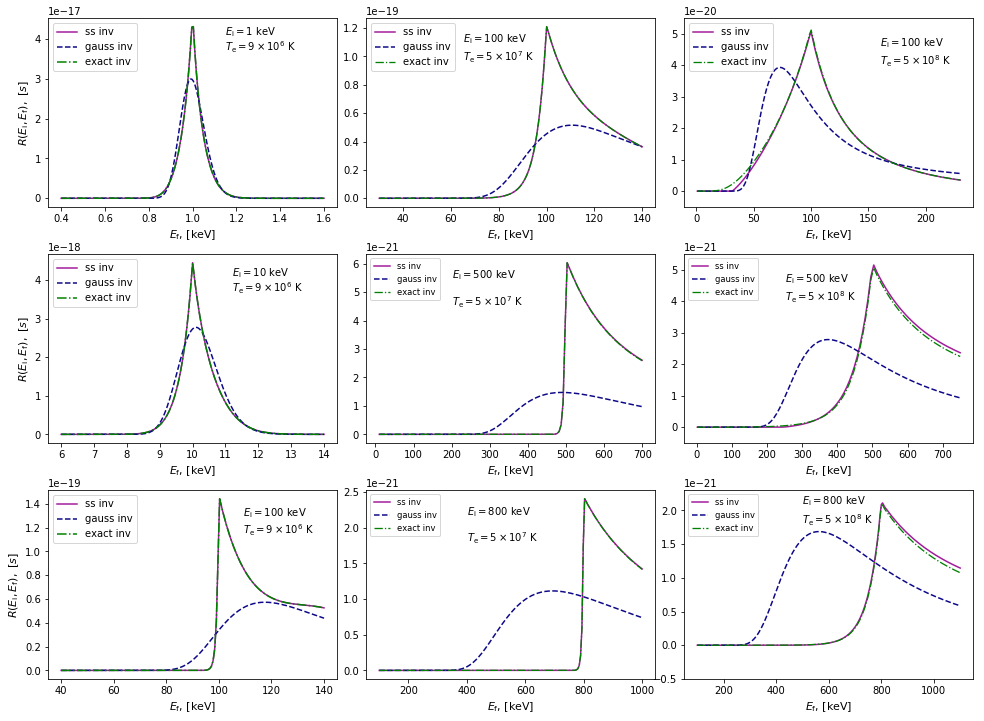

In [2]:
# comparison for wider range of intial photon energies and temperatures:

matplotlib.rcParams['figure.figsize'] = (15.12, 10.2)#(12.6, 8.5)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6) , (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, gridspec_kw={'top': 0.95, 'bottom': 0.05, 'wspace': 0.1, 'hspace': 0.25, 'left':0.05})

homega_i_arr = np.array([1., 10., 100., 500., 800.]) * c.keverg

colors = plt.cm.plasma(np.linspace(0., 0.7, 3))

Mn = 100
gn = 100
#############################################################################
# lower temprature:
kT = 9e+6 * c.kerg

homega_i = homega_i_arr[0]
homega = np.logspace(np.log10(0.4), np.log10(1.6), 200) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred_inv(homega_i, homega, kT)  / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax1.plot(homega*c.ergkev, red_e1, label=r'ss inv', color=colors[1])
ax1.plot(homega*c.ergkev, red_e2, label=r'gauss inv', color=colors[0], linestyle='--')
ax1.plot(homega*c.ergkev, red_e3, label=r'exact inv', color='g', linestyle='-.')
ax1.set_ylabel(r"$R(E_{\mathrm{i}}, E_{\mathrm{f}}), \ [s]$", fontsize=11)
ax1.text(1.15, 4.1e-17, r'$E_{\mathrm{i}} = 1$ keV', fontsize=10)
ax1.text(1.15, 3.7e-17, r'$T_{\mathrm{e}} = 9 \times 10^{6}$ K', fontsize=10)
ax1.legend(loc='upper left')
ax1.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)

homega_i = homega_i_arr[1]
homega = np.logspace(np.log10(6.), np.log10(14.), 200) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred_inv(homega_i, homega, kT)  / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax4.plot(homega*c.ergkev, red_e1, label=r'ss inv', color=colors[1])
ax4.plot(homega*c.ergkev, red_e2, label=r'gauss inv', color=colors[0], linestyle='--')
ax4.plot(homega*c.ergkev, red_e3, label=r'exact inv', color='g', linestyle='-.')
ax4.set_ylabel(r"$R(E_{\mathrm{i}}, E_{\mathrm{f}}), \ [s]$", fontsize=11)
ax4.text(11.2, 4.1e-18, r'$E_{\mathrm{i}} = 10$ keV', fontsize=10)
ax4.text(11.2, 3.7e-18, r'$T_{\mathrm{e}} = 9 \times 10^{6}$ K', fontsize=10)
ax4.legend(loc='upper left')
ax4.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)

homega_i = homega_i_arr[2]
homega = np.logspace(np.log10(40.), np.log10(140.), 200) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred_inv(homega_i, homega, kT)  / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
#red_e3 = sct.red_angint('exact', homega_i, homega, kT, Mn) / (c.sigma_Th)*c.herg
ax7.plot(homega*c.ergkev, red_e1, label=r'ss inv', color=colors[1])
ax7.plot(homega*c.ergkev, red_e2, label=r'gauss inv', color=colors[0], linestyle='--')
ax7.plot(homega*c.ergkev, red_e3, label=r'exact inv', color='g', linestyle='-.')
#ax5.plot(homega*c.ergkev, red_e3, label=r'exact', color=colors[2], linestyle=':')
ax7.set_ylabel(r"$R(E_{\mathrm{i}}, E_{\mathrm{f}}), \ [s]$", fontsize=11)
ax7.text(109, 1.3e-19, r'$E_{\mathrm{i}} = 100$ keV', fontsize=10)
ax7.text(109, 1.15e-19, r'$T_{\mathrm{e}} = 9 \times 10^{6}$ K', fontsize=10)
ax7.legend(loc='upper left')
ax7.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)
#############################################################################
# higher temprature

kT = 5e+7 * c.kerg

homega_i = homega_i_arr[2]
homega = np.logspace(np.log10(30.), np.log10(140.), 400) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred_inv(homega_i, homega, kT)  / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax2.plot(homega*c.ergkev, red_e1, label=r'ss inv', color=colors[1])
ax2.plot(homega*c.ergkev, red_e2, label=r'gauss inv', color=colors[0], linestyle='--')
ax2.plot(homega*c.ergkev, red_e3, label=r'exact inv', color='g', linestyle='-.', linewidth=1.3)
ax2.text(65., 1.1e-19, r'$E_{\mathrm{i}} = 100$ keV', fontsize=10)
ax2.text(65., 0.965e-19, r'$T_{\mathrm{e}} = 5 \times 10^{7}$ K', fontsize=10)
ax2.legend(loc='upper left')
ax2.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)

homega_i = homega_i_arr[3]
homega = np.logspace(np.log10(10.), np.log10(700.), 400) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred_inv(homega_i, homega, kT) / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax5.plot(homega*c.ergkev, red_e1, label=r'ss inv', color=colors[1])
ax5.plot(homega*c.ergkev, red_e2, label=r'gauss inv', color=colors[0], linestyle='--')
ax5.plot(homega*c.ergkev, red_e3, label=r'exact inv', color='g', linestyle='-.', linewidth=1.3)
ax5.text(200., 5.5e-21, r'$E_{\mathrm{i}} = 500$ keV', fontsize=10)
ax5.text(200., 4.5e-21, r'$T_{\mathrm{e}} = 5 \times 10^{7}$ K', fontsize=10)
ax5.legend(loc='upper left', fontsize='small')
ax5.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)

homega_i = homega_i_arr[4]
homega = np.logspace(np.log10(100.), np.log10(1000.), 400) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred_inv(homega_i, homega, kT)  / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax8.plot(homega*c.ergkev, red_e1, label=r'ss inv', color=colors[1])
ax8.plot(homega*c.ergkev, red_e2, label=r'gauss inv', color=colors[0], linestyle='--')
ax8.plot(homega*c.ergkev, red_e3, label=r'exact inv', color='g', linestyle='-.', linewidth=1.3)
ax8.text(400, 2.18e-21, r'$E_{\mathrm{i}} = 800$ keV', fontsize=10)
ax8.text(400, 1.8e-21, r'$T_{\mathrm{e}} = 5 \times 10^{7}$ K', fontsize=10)
ax8.legend(loc='upper left', fontsize='small')
ax8.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)
#ax8.set_ylim(-0.06e-16, 0.05e-16)

# very high temprature

kT = 5e+8 * c.kerg

homega_i = homega_i_arr[2]
homega = np.logspace(np.log10(1.), np.log10(230.), 400) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred_inv(homega_i, homega, kT)  / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax3.plot(homega*c.ergkev, red_e1, label=r'ss inv', color=colors[1])
ax3.plot(homega*c.ergkev, red_e2, label=r'gauss inv', color=colors[0], linestyle='--')
ax3.plot(homega*c.ergkev, red_e3, label=r'exact inv', color='g', linestyle='-.', linewidth=1.3)
ax3.text(160., 4.6e-20, r'$E_{\mathrm{i}} = 100$ keV', fontsize=10)
ax3.text(160., 4.e-20, r'$T_{\mathrm{e}} = 5 \times 10^{8}$ K', fontsize=10)
ax3.legend(loc='upper left')
ax3.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)
ax3.set_ylim(-0.5e-20, 5.5e-20)

homega_i = homega_i_arr[3]
homega = np.logspace(np.log10(1.), np.log10(750.), 400) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred_inv(homega_i, homega, kT) / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax6.plot(homega*c.ergkev, red_e1, label=r'ss inv', color=colors[1])
ax6.plot(homega*c.ergkev, red_e2, label=r'gauss inv', color=colors[0], linestyle='--')
ax6.plot(homega*c.ergkev, red_e3, label=r'exact inv', color='g', linestyle='-.', linewidth=1.3)
ax6.text(250., 4.6e-21, r'$E_{\mathrm{i}} = 500$ keV', fontsize=10)
ax6.text(250., 4.e-21, r'$T_{\mathrm{e}} = 5 \times 10^{8}$ K', fontsize=10)
ax6.legend(loc='upper left', fontsize='small')
ax6.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)
ax6.set_ylim(-0.5e-21, 5.5e-21)

homega_i = homega_i_arr[4]
homega = np.logspace(np.log10(100.), np.log10(1100.), 400) * c.keverg
sigma_KN = sct.scatklfull(homega)
red_e1 = sct.red_angint('ss_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
red_e2 = sct.gaussred_inv(homega_i, homega, kT) / (c.sigma_Th)*c.herg #* sigma_KN
red_e3 = sct.red_angint('exact_inv', homega_i, homega, kT, Mn, gn) / (c.sigma_Th)*c.herg
ax9.plot(homega*c.ergkev, red_e1, label=r'ss inv', color=colors[1])
ax9.plot(homega*c.ergkev, red_e2, label=r'gauss inv', color=colors[0], linestyle='--')
ax9.plot(homega*c.ergkev, red_e3, label=r'exact inv', color='g', linestyle='-.', linewidth=1.3)
ax9.text(500., 2.1e-21, r'$E_{\mathrm{i}} = 800$ keV', fontsize=10)
ax9.text(500., 1.8e-21, r'$T_{\mathrm{e}} = 5 \times 10^{8}$ K', fontsize=10)
ax9.legend(loc='upper left', fontsize='small')
ax9.set_xlabel(r'$E_{\mathrm{f}}$, [keV]', fontsize=11)
ax9.set_ylim(-0.5e-21, 2.3e-21)

plt.savefig('./comptred_tex/figs/rfinv_all.pdf', dpi=600)

plt.show()

**Note (Katya):** for small temperature numerical integration over the Maxwell-Juenter redistribution requiers a more and more points to be precise (for kT=1e+4:
gn > 2000). Or to use the other way of calculation (change the condition value in red_angexact(_inv) to lower one). But the first way still seems to be faster (need to do some tests, but it doesn't really change much).

### Normalization of the redistribution functions:

Before continuing the comparison, we have to make sure that all redistribution functions are normalized in such a way that all integrals $\int R_{\mathrm{gauss}}(E_{i}, E_{f})dE_{f}$, $\int R_{\mathrm{SS}}(E_{i}, E_{f})dE_{f}$ and $\int R_{\mathrm{exact}}(E_{i}, E_{f})dE_{f}$ give the same result. At low enough electron temperatures ($kT \lessapprox 4$ keV or $T \lessapprox 5\times10^{7}$ K), these integrals are equel to Klein-Nishina cross section:


$$\sigma_{\mathrm{KN}}(x) = \sigma_{\mathrm{T}}\frac{3}{4}\bigg[\frac{1+x}{x^{3}}\bigg\{\frac{2x(1+x)}{1+2x}-\ln(1+2x)  \bigg\}+\frac{1}{2x}\ln(1+2x) - \frac{1+3x}{(1+2x)^{2}}\bigg] \ ,$$


where $x=E/m_{\mathrm{e}}c^{2}$.

For higher tempratures, however, the exact formula for photon scattering off the relativistic electrons, which takes into account the relativistic Maxwellian distribution of the electrons (Poutanen & Svensson, 1996), has to be used for normalization:

\begin{eqnarray}
\sigma_{\mathrm{CS}}(x) = \frac{3\sigma_{\mathrm{T}}}{16x^{2}\Theta K_{2}(1/\Theta)} \int^{\infty}_{1} \mathrm{e}^{-\gamma/\Theta} \left \{ \left(x\gamma + \frac{9}{2} + \frac{2\gamma}{x} \right)\ln\left[ \frac{1+2x(\gamma+z)}{1+2x(\gamma-z)}\right] - 2xz \\+ z\left(x-\frac{2}{x}\right)\ln(1+4x\gamma+4x^{2}) + \frac{4x^{2}z(\gamma + x)}{1+4x\gamma+4x^{2}} - 2\int^{x(\gamma+z)}_{x(\gamma-z)}\ln(1+2\xi)\frac{d\xi}{\xi}\right \}d{\gamma} \ ,
\end{eqnarray}

where $\Theta=kT/m_{\mathrm{e}}c^{2}$ and $z=\sqrt{\gamma^{2}-1}$.

**Note: for further calculation we normalize all three function to exact total cross section $\sigma_{\mathrm{CS}}$ (including gaussian-like one! Ulike what we had before):
$$R(E_{\mathrm{i}}, E_{\mathrm{f}}) = R(E_{\mathrm{i}}, E_{\mathrm{f}}) \frac{\sigma_{\mathrm{CS}}(E_{\mathrm{f}})}{\int R(E_{\mathrm{i}}, E_{\mathrm{f}})dE_{\mathrm{f}}} \ ,$$**

Let's illustrate the difference of the exact total cross section from Klein Nishina cross section (which is the limiting case at $\Theta \ll 1$): 

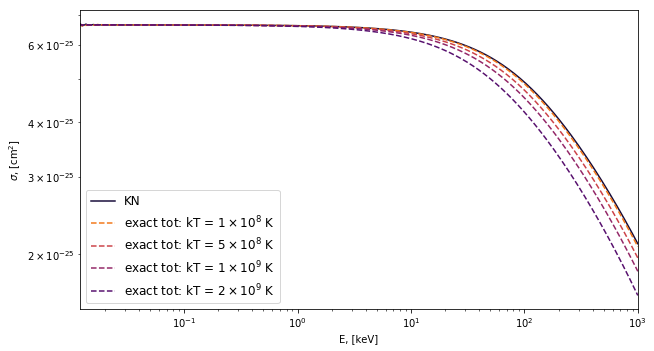

In [2]:
matplotlib.rcParams['figure.figsize'] = (10, 5.5)

colors = plt.cm.inferno(np.linspace(0.7, 0.1, 5))

kT_k = np.array([1e+8, 5e+8, 1e+9, 2e+9])
kT_str = np.array([r'$1\times10^{8}$', r'$5\times10^{8}$', r'$1\times10^{9}$', r'$2\times10^{9}$'])
kT = kT_k * c.kerg
E_grid = np.logspace(-2., 3., 300) * c.keverg

sigma_KN = sct.scatklfull(E_grid)
plt.loglog(E_grid*c.ergkev, sigma_KN, color=colors[4], label=r'KN')

for i in range(kT_k.size):
    sigma_CS = sct.scatfull(E_grid, kT[i])
    plt.loglog(E_grid*c.ergkev, sigma_CS, color=colors[i], label=r'exact tot: kT = ' + kT_str[i] + ' K', linestyle='--')

plt.legend(loc='lower left', fontsize='large')
plt.xlabel(r'E, [keV]')
plt.xlim(0.012, 1000.)
plt.ylabel(r'$\sigma$, [cm$^{2}$]')

plt.savefig('./comptred_tex/figs/KN_vs_exact.pdf', dpi=300)

plt.show()


#### The next plots are not really illustrative, just the check that normalization to the total exact cross section is correct for all redistribution functions.

In [3]:
kT = 1e+9 * c.kerg
E_grid = np.logspace(-2., 3., 100) * c.keverg
Mn = 20
gn = 100
sigma_KN1 = np.zeros(E_grid.size)
sigma_KN2 = np.zeros(E_grid.size)
sigma_KN3 = np.zeros(E_grid.size)
sigma_KN = sct.scatklfull(E_grid)
sigma_CS = sct.scatfull(E_grid, kT)

Re_ss = pr.redfunc_pre('ss', E_grid, kT, Mn, gn)
Re_exact = pr.redfunc_pre('exact', E_grid, kT, Mn, gn)
Re_gauss = pr.redfunc_pre('gauss', E_grid, kT, Mn, gn)

for i in range(E_grid.size):
        sigma_KN1[i] = np.trapz(Re_ss[i, :], E_grid)
        sigma_KN2[i] = np.trapz(Re_exact[i, :], E_grid)
        sigma_KN3[i] = np.trapz(Re_gauss[i, :], E_grid)

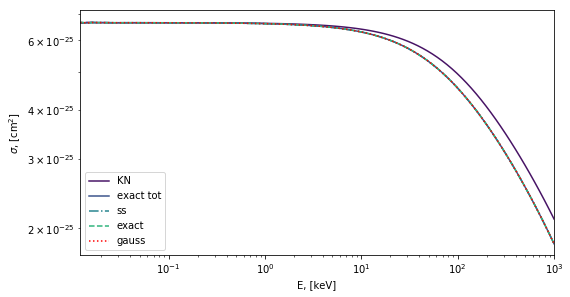

In [4]:
matplotlib.rcParams['figure.figsize'] = (8.5, 4.5)
colors = plt.cm.viridis(np.linspace(0.05, 0.65, 4))
plt.loglog(E_grid*c.ergkev, sigma_KN, color=colors[0], label=r'KN')
plt.loglog(E_grid*c.ergkev, sigma_CS, color=colors[1], label=r'exact tot')
plt.loglog(E_grid*c.ergkev, sigma_KN1, color=colors[2], linestyle='-.', label=r'ss')
plt.loglog(E_grid*c.ergkev, sigma_KN2, color=colors[3], linestyle='--', label=r'exact')
plt.loglog(E_grid*c.ergkev, sigma_KN3, color='r', linestyle=':', label=r'gauss')
plt.xlim(0.012, 1000.)
plt.legend()
plt.xlabel(r'E, [keV]')
plt.ylabel(r'$\sigma$, [cm$^{2}$]')
#plt.ylim(1e-25, 1e-24)

plt.savefig('./comptred_tex/figs/KN.pdf', dpi=300)

plt.show()

### Convolution check for redistribution functions

Now in order to test how significant is the influence of the differences in the redistribution functions themselves to the source function for radiative transfer equation we want to compute the integrals:

$$J^{'}(E_{i}) = \frac{1}{\sigma_{\mathrm{CS}}(E_{i})}\int^{E_{\mathrm{max}}}_{E_{\mathrm{min}}}dE_{f}J(E_{f})R(E_{f}, E_{i}) \ .$$

Note that in the scattering integral for the radiative transfer equation without induced processes the inverse function $R(E_{\mathrm{f}}, E_{\mathrm{i}})$  (not $R(E_{\mathrm{i}}, E_{\mathrm{f}})$) has to be used.

In [2]:
def cutoffpl(gamma, E_fold, E_grid):
    '''
    power law + cutoff
    photons / sm^2 / s / keV
    '''
    F_cpl = (E_grid)**(-gamma) * np.exp(-E_grid/E_fold)
    return F_cpl

def bbint(homega, kt):
    """Black body spectra
    returns the intensity in erg / s / cm^2 / strd / Hz
    """
    I_bb = np.zeros((homega.size))
    for ni in range(I_bb.size):
        if homega[ni] / kt < 0.01:
            I_bb[ni] = 2. * kt * (homega[ni]/(c.herg*c.cl))**2
        elif homega[ni] / kt > 10.:
            I_bb[ni] = 2. * homega[ni]**3 / (c.herg*c.cl)**2 * np.exp(-homega[ni]/kt) 
        else:
            I_bb[ni] = 2. * homega[ni]**3 / (c.herg*c.cl)**2 /(np.exp(homega[ni]/kt) - 1.)
    return I_bb


In [3]:
def scatint(E_grid, F_cpl, R_e, sigma):
    '''
    ...kind of convolution...

    Args:
        E_grid: [ndarray]    energy grid in erg
        E_cpl:  [ndarray]    function which has to be convolved with red. func.
        R_e:    [2D ndarray] redistribution function

    Returns:
        S:      [ndarray]    result of the convolution

    NOTE: inside the integral the redistribution function for inverse process
    has to be used
    '''

    S = np.zeros((E_grid.size))
    for i in range(E_grid.size):
        core = F_cpl * R_e[i, :] / sigma[i]#sct.scatfull(np.array([E_grid[i]]), kT)
        S[i] = np.trapz(core, E_grid) #/ sigma[i]
    return S

### Implementing the multiple convolution for continuum given by power law + cutoff (cutoffpl) with different redistribution functions at different temperatures:

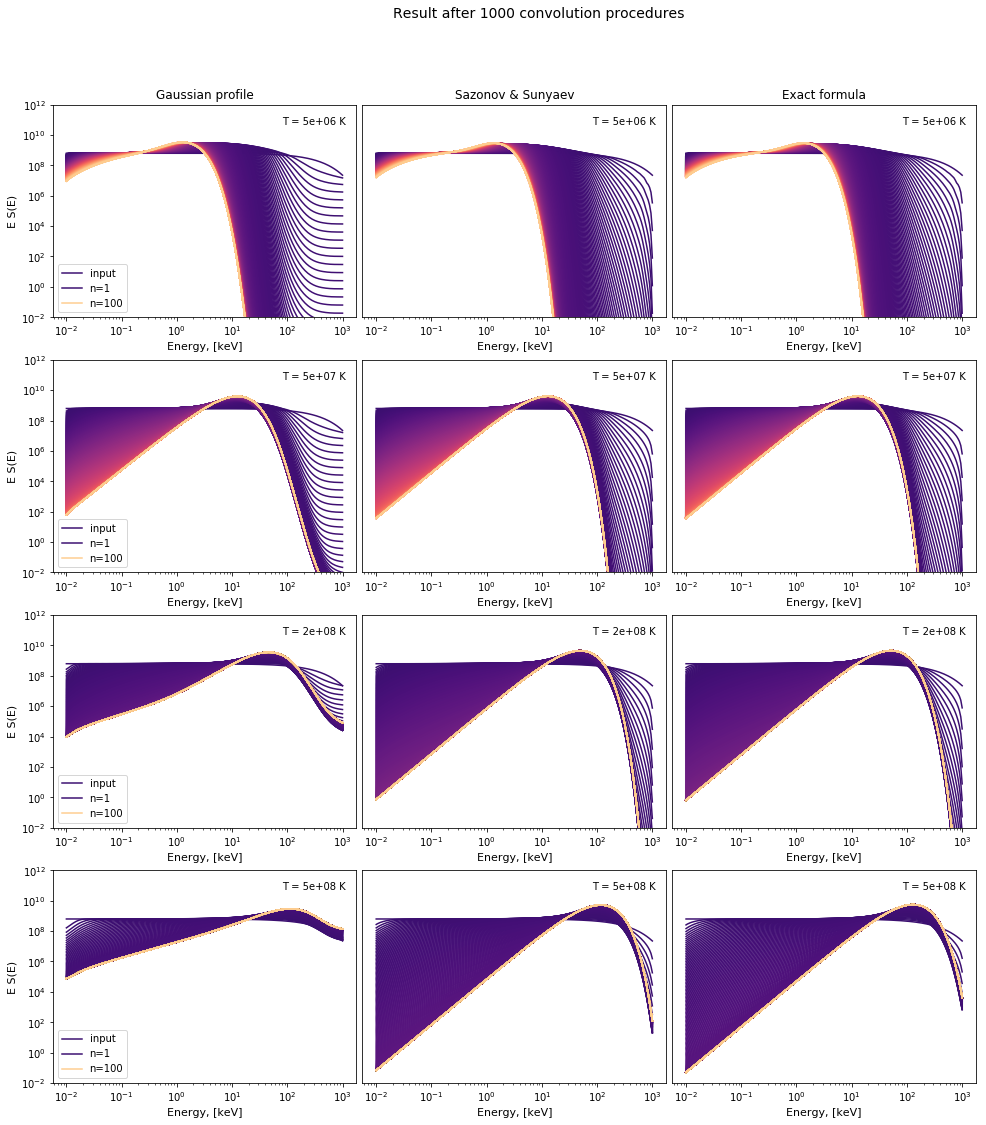

In [19]:
# we have precalculated exact redistribution functions for the next temperatures:
# 1e+6, 5e+6, 1e+7, 5e+7, 8e+7, 1e+8, 2e+8, 4e+8, 5e+8, 8e+8, 1e+9
# path: ./redfunc_pre/re_exact_kT1e+6'; Energy grid: np.logspace(-2., 3., 500) * c.keverg

# we also have precalculated exact and ss function for low temperatures:
# 1e+4, 5e+4, 1e+5, 5e+5
# path: ./conv_test/re_kT1e+6'; Energy grid: np.logspace(-2., 3., 1000) * c.keverg

kT_K = np.array([5e+6, 5e+7, 2e+8, 5e+8])
kT = kT_K * c.kerg

gamma = 1.
E_fold = 300. * c.keverg
Mn = 50#100
gn = 100
nn = 1000

E_grid = np.logspace(-2., np.log10(1000.), 200) * c.keverg

matplotlib.rcParams['figure.figsize'] = (15, 18)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(nrows=4, ncols=3, gridspec_kw={'wspace': 0.02, 'hspace': 0.2, 'left':0.045})
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
colors = plt.cm.magma(np.linspace(0.2, 0.9, nn+5))
fig.text(0.36, 0.95, r'Result after %i convolution procedures' %nn, va='center', fontsize='14')


for kti in range(4):

    F_cpl = cutoffpl(gamma, E_fold, E_grid)
    ax[kti*3].loglog(E_grid*c.ergkev, F_cpl*E_grid*c.ergkev, color=colors[0], label=r'input')
    ax[kti*3+1].loglog(E_grid*c.ergkev, F_cpl*E_grid*c.ergkev, color=colors[0], label=r'input')
    ax[kti*3+2].loglog(E_grid*c.ergkev, F_cpl*E_grid*c.ergkev, color=colors[0], label=r'input')
  
    Re_gauss = pr.redfunc_pre_inv('gauss', E_grid, kT[kti], Mn, gn)
    Re_ss = pr.redfunc_pre_inv('ss', E_grid, kT[kti], Mn, gn)
    Re_exact = pr.redfunc_pre_inv('exact', E_grid, kT[kti], Mn, gn)
    #file = './redfunc_pre/re_exact_kT%.0e' % (kT_K[kti])
    #np.savez(file, Re_exact, Re_ss)
    #data = np.load(file+'.npz')
    #Re_exact = data['arr_0']
    
    sigma = sct.scatfull(E_grid, kT[kti])
    
    S1_mult = scatint(E_grid, F_cpl, Re_gauss, sigma) #/ sigma
    ax[kti*3].loglog(E_grid*c.ergkev, S1_mult*E_grid*c.ergkev, color=colors[2], label=r'n=1')
    S2_mult = scatint(E_grid, F_cpl, Re_ss, sigma) #/ sigma
    ax[kti*3+1].loglog(E_grid*c.ergkev, S2_mult*E_grid*c.ergkev, color=colors[2])
    S3_mult = scatint(E_grid, F_cpl, Re_exact, sigma)
    ax[kti*3+2].loglog(E_grid*c.ergkev, S3_mult*E_grid*c.ergkev, color=colors[2])

    for i in range(nn-1):
        S1_mult = scatint(E_grid, S1_mult, Re_gauss, sigma) #/ sigma
        if i == nn-2:
            ax[kti*3].loglog(E_grid*c.ergkev, S1_mult*E_grid*c.ergkev, color=colors[i+2], label=r'n=100')
        else:
            ax[kti*3].loglog(E_grid*c.ergkev, S1_mult*E_grid*c.ergkev, color=colors[i+2])
        S2_mult = scatint(E_grid, S2_mult, Re_ss, sigma) #/ sigma
        ax[kti*3+1].loglog(E_grid*c.ergkev, S2_mult*E_grid*c.ergkev, color=colors[i+2])
        S3_mult = scatint(E_grid, S3_mult, Re_exact, sigma)
        ax[kti*3+2].loglog(E_grid*c.ergkev, S3_mult*E_grid*c.ergkev, color=colors[i+2])

    ax[kti*3].set_ylim(1e-2, 1e+12)
    ax[kti*3].set_xlabel(r'Energy, [keV]', fontsize=11)
    ax[kti*3].set_ylabel(r'E S(E)', fontsize=11)
    ax[kti*3].legend(loc='lower left')
    ax[kti*3].text(80., 0.5e+11, r'T = %.e K' % (kT_K[kti]))

    ax[kti*3+1].set_ylim(1e-2, 1e+12)
    ax[kti*3+1].set_xlabel(r'Energy, [keV]', fontsize=11)
    ax[kti*3+1].text(80., 0.5e+11, r'T = %.e K' % (kT_K[kti]))
    ax[kti*3+1].set_yticks([])

    ax[kti*3+2].set_ylim(1e-2, 1e+12)
    ax[kti*3+2].set_xlabel(r'Energy, [keV]', fontsize=11)
    ax[kti*3+2].text(80., 0.5e+11, r'T = %.e K' % (kT_K[kti]))
    ax[kti*3+2].set_yticks([])

ax[2].set_title(r'Exact formula', fontsize=12)
ax[1].set_title(r'Sazonov & Sunyaev', fontsize=12)
ax[0].set_title(r'Gaussian profile', fontsize=12)

plt.savefig('./comptred_tex/figs/convproc_all.pdf', dpi=300)

plt.show()

#### With higher temperature the differences in the result of the convolution are more pronounced.

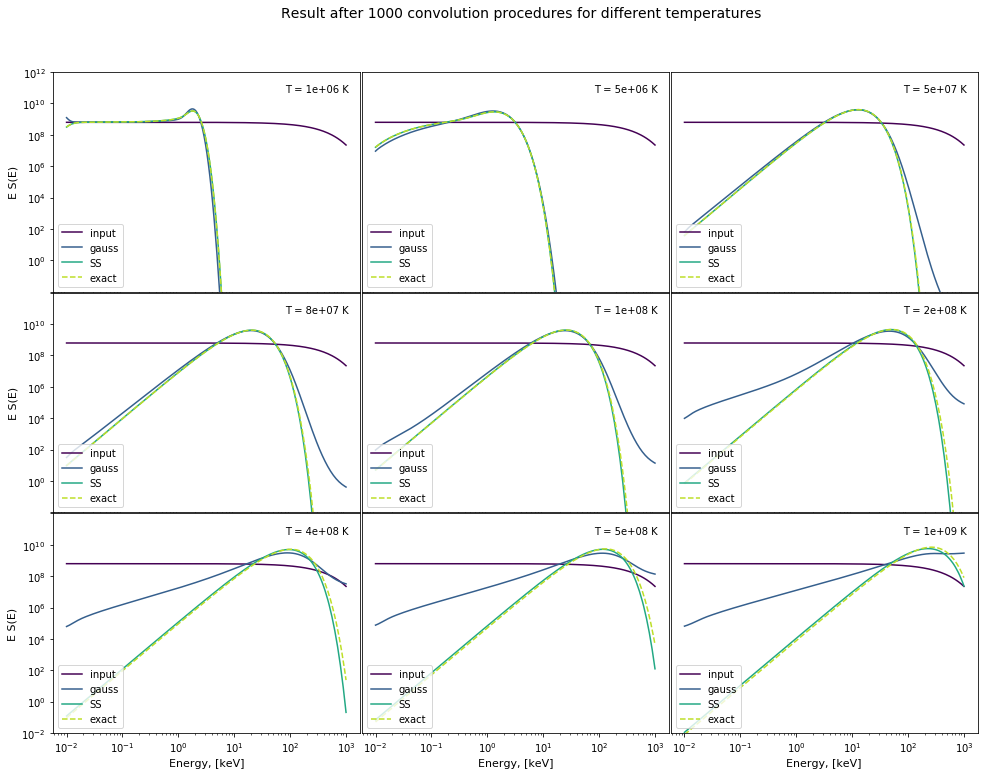

In [16]:
matplotlib.rcParams['figure.figsize'] = (15.12, 10.2)#(12.6, 8.5)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6) , (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, gridspec_kw={'top': 0.95, 'bottom': 0.05, 'wspace': 0.005, 'hspace': 0.005, 'left':0.05})
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
colors = plt.cm.viridis(np.linspace(0., 0.9, 4))

kT_K = np.array([1e+6, 5e+6, 5e+7, 8e+7, 1e+8, 2e+8, 4e+8, 5e+8, 1e+9])
kT = kT_K * c.kerg
gamma = 1.
E_fold = 300. * c.keverg
Mn = 50
gn = 100
nn = 1000

fig.text(0.26, 1.03, r'Result after %i convolution procedures for different temperatures' %nn, va='center', fontsize='14')

E_grid = np.logspace(-2., np.log10(1000.), 200) * c.keverg
F_cpl = cutoffpl(gamma, E_fold, E_grid)

for kti in range(kT_K.size):
    ax[kti].loglog(E_grid*c.ergkev, F_cpl*E_grid*c.ergkev, color=colors[0], label=r'input')
    Re_gauss = pr.redfunc_pre_inv('gauss', E_grid, kT[kti], Mn, gn)
    Re_ss = pr.redfunc_pre_inv('ss', E_grid, kT[kti], Mn, gn)
    Re_exact = pr.redfunc_pre_inv('exact', E_grid, kT[kti], Mn, gn)
    #file = './redfunc_pre/re_exact_kT%.0e' % (kT_K[kti])
    #np.savez(file, Re_exact, Re_ss)
    #data = np.load(file+'.npz')
    #Re_exact = data['arr_0']
    
    sigma = sct.scatfull(E_grid, kT[kti])
    
    S1_mult = scatint(E_grid, F_cpl, Re_gauss, sigma)
    #ax[kti].loglog(E_grid*c.ergkev, S1_mult, color=colors[2], label=r'n=1')
    S2_mult = scatint(E_grid, F_cpl, Re_ss, sigma)
    #ax[kti].loglog(E_grid*c.ergkev, S2_mult, color=colors[2])
    S3_mult = scatint(E_grid, F_cpl, Re_exact, sigma)
    #ax3.loglog(E_grid*c.ergkev, S3_mult, color=colors[2])
    
    for i in range(nn-1):
        S1_mult = scatint(E_grid, S1_mult, Re_gauss, sigma)
        #if i == nn-2:
        #    ax[kti].loglog(E_grid*c.ergkev, S1_mult, color=colors[i+2], label=r'n=100')
        #else:
        #    ax[kti].loglog(E_grid*c.ergkev, S1_mult, color=colors[i+2])
        S2_mult = scatint(E_grid, S2_mult, Re_ss, sigma)
        #ax[kti].loglog(E_grid*c.ergkev, S2_mult, color=colors[i+2])
        S3_mult = scatint(E_grid, S3_mult, Re_exact, sigma)
        #ax3.loglog(E_grid*c.ergkev, S3_mult, color=colors[i+2])
        
    ax[kti].loglog(E_grid*c.ergkev, S1_mult*E_grid*c.ergkev, color=colors[1], label=r'gauss')
    ax[kti].loglog(E_grid*c.ergkev, S2_mult*E_grid*c.ergkev, color=colors[2], label=r'SS', linestyle='-')
    ax[kti].loglog(E_grid*c.ergkev, S3_mult*E_grid*c.ergkev, color=colors[3], label=r'exact', linestyle='--')
    ax[kti].legend(loc='lower left')
    ax[kti].set_ylim(1e-2, 1e+12)
    ax[kti].text(80., 0.5e+11, r'T = %.e K' % (kT_K[kti]))
    if kti != 0 and kti != 3 and kti != 6:
        ax[kti].set_yticks([])
    if kti != 6 and kti != 7 and kti != 8:
        ax[kti].set_xticks([])
    
ax[0].set_yticklabels(['', '', r'$10^{0}$', r'$10^{2}$', r'$10^{4}$', r'$10^{6}$', r'$10^{8}$', r'$10^{10}$', r'$10^{12}$'])
ax[3].set_yticklabels(['', '', r'$10^{0}$', r'$10^{2}$', r'$10^{4}$', r'$10^{6}$', r'$10^{8}$', r'$10^{10}$', ''])
ax[6].set_yticklabels(['', r'$10^{-2}$', r'$10^{0}$', r'$10^{2}$', r'$10^{4}$', r'$10^{6}$', r'$10^{8}$', r'$10^{10}$', ''])
ax[6].set_xlabel(r'Energy, [keV]', fontsize=11)
ax[7].set_xlabel(r'Energy, [keV]', fontsize=11)
ax[8].set_xlabel(r'Energy, [keV]', fontsize=11)
ax[0].set_ylabel(r'E S(E)', fontsize=11)
ax[3].set_ylabel(r'E S(E)', fontsize=11)
ax[6].set_ylabel(r'E S(E)', fontsize=11)

plt.savefig('./comptred_tex/figs/convres_all.pdf', dpi=300)
plt.show()

#### The speed of the convergence is differenet for different redistribution functions:

If it happens that gaussian-like kernel gives fast and correct convergence for low temperatures - we need to think about the switch between two functions during the calculations.

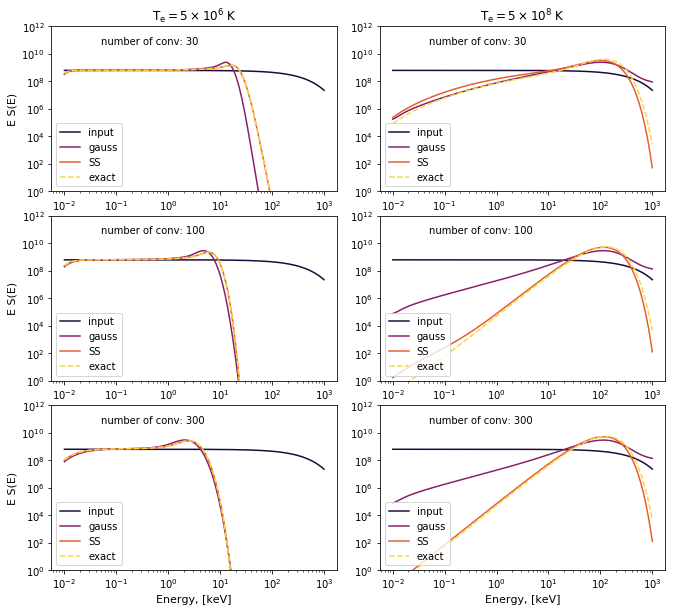

In [18]:
matplotlib.rcParams['figure.figsize'] = (11, 10)

colors = plt.cm.inferno(np.linspace(0.1, 0.9, 4))

fig2, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, gridspec_kw={'wspace': 0.15, 'hspace': 0.15}) 
ax = [ax1, ax3, ax5, ax2, ax4, ax6]

nn = np.array([30, 100, 300, 30, 100, 300])
kT_K = np.array([5e+6, 5e+6, 5e+6, 5e+8, 5e+8, 5e+8])
kT = kT_K * c.kerg
gamma = 1
E_fold = 300 * c.keverg

E_grid = np.logspace(-2., np.log10(1000.), 200) * c.keverg
F_cpl = cutoffpl(gamma, E_fold, E_grid)

Mn = 50
gn = 100

for i in range(6):
    ax[i].loglog(E_grid*c.ergkev, F_cpl*E_grid*c.ergkev, color=colors[0], label=r'input')
    if i%3 == 0:
        Re_gauss = pr.redfunc_pre_inv('gauss', E_grid, kT[i], Mn, gn)
        Re_ss = pr.redfunc_pre_inv('ss', E_grid, kT[i], Mn, gn)
        Re_exact = pr.redfunc_pre_inv('exact', E_grid, kT[i], Mn, gn)
        #file = './redfunc_pre/re_exact_kT%.0e' % (kT_K[i])
        #np.savez(file, Re_exact, Re_ss)
        #data = np.load(file+'.npz')
        #Re_exact = data['arr_0']

        sigma = sct.scatfull(E_grid, kT[i])

    S1_mult = scatint(E_grid, F_cpl, Re_gauss, sigma)
    #ax[kti].loglog(E_grid*c.ergkev, S1_mult, color=colors[2], label=r'n=1')
    S2_mult = scatint(E_grid, F_cpl, Re_ss, sigma)
    #ax[kti].loglog(E_grid*c.ergkev, S2_mult, color=colors[2])
    S3_mult = scatint(E_grid, F_cpl, Re_exact, sigma)
    #ax3.loglog(E_grid*c.ergkev, S3_mult, color=colors[2])
    
    for ii in range(nn[i]-1):
        S1_mult = scatint(E_grid, S1_mult, Re_gauss, sigma)
        #if i == nn-2:
        #    ax[kti].loglog(E_grid*c.ergkev, S1_mult, color=colors[i+2], label=r'n=100')
        #else:
        #    ax[kti].loglog(E_grid*c.ergkev, S1_mult, color=colors[i+2])
        S2_mult = scatint(E_grid, S2_mult, Re_ss, sigma)
        #ax[kti].loglog(E_grid*c.ergkev, S2_mult, color=colors[i+2])
        S3_mult = scatint(E_grid, S3_mult, Re_exact, sigma)
        #ax3.loglog(E_grid*c.ergkev, S3_mult, color=colors[i+2])
        
    ax[i].loglog(E_grid*c.ergkev, S1_mult*E_grid*c.ergkev, color=colors[1], label=r'gauss')
    ax[i].loglog(E_grid*c.ergkev, S2_mult*E_grid*c.ergkev, color=colors[2], label=r'SS', linestyle='-')
    ax[i].loglog(E_grid*c.ergkev, S3_mult*E_grid*c.ergkev, color=colors[3], label=r'exact', linestyle='--')
    ax[i].legend(loc='lower left')
    ax[i].set_ylim(1e+0, 1e+12)
    ax[i].text(0.05, 0.5e+11, r'number of conv: %i' % (nn[i]))

ax[0].set_title(r'T$_{\mathrm{e}}=5\times10^{6}$ K')
ax[3].set_title(r'T$_{\mathrm{e}}=5\times10^{8}$ K')
ax[2].set_xlabel(r'Energy, [keV]', fontsize=11)
ax[5].set_xlabel(r'Energy, [keV]', fontsize=11)
for i in range(0, 3):
    ax[i].set_ylabel(r'E S(E)', fontsize=11)
    
plt.savefig('./comptred_tex/figs/convspeed_dif.pdf', dpi=300)
plt.show()
    

#### The beheviour of the redistribution fucntions for low temperatures is a bit confusing:

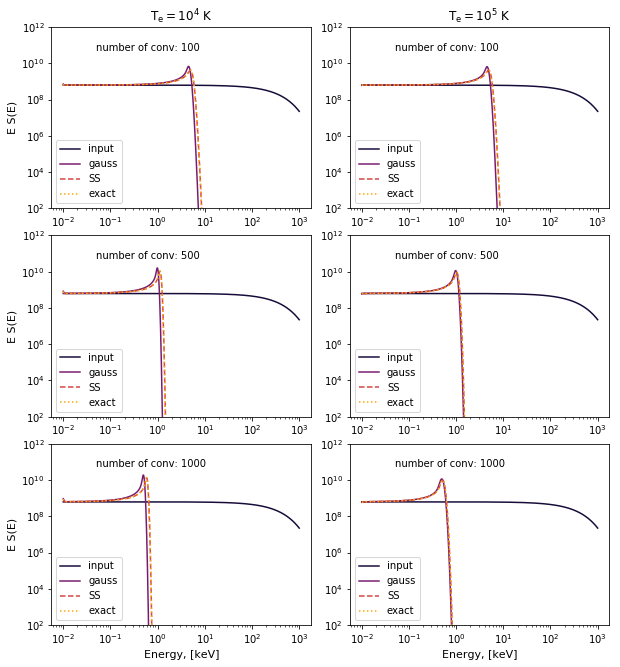

In [15]:
matplotlib.rcParams['figure.figsize'] = (10, 11)

colors = plt.cm.inferno(np.linspace(0.1, 0.8, 4))

fig2, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, gridspec_kw={'wspace': 0.15, 'hspace': 0.15}) 
ax = [ax1, ax3, ax5, ax2, ax4, ax6]

nn = np.array([100, 500, 1000, 100, 500, 1000])
kT_K = np.array([1e+4, 1e+4, 1e+4, 5e+4, 5e+4, 5e+4])
kT = kT_K * c.kerg

gamma = 1
E_fold = 300. * c.keverg
E_grid = np.logspace(-2., np.log10(1000.), 5000) * c.keverg
F_cpl = cutoffpl(gamma, E_fold, E_grid)

Mn = 300
gn = 100

for i in range(6):
    #print(i)
    ax[i].loglog(E_grid*c.ergkev, F_cpl*E_grid*c.ergkev, color=colors[0], label=r'input')
    if i%3 == 0:
        Re_gauss = pr.redfunc_pre_inv('gauss', E_grid, kT[i], Mn, gn)
        Re_ss = pr.redfunc_pre_inv('ss', E_grid, kT[i], Mn, gn)
        Re_exact = pr.redfunc_pre_inv('exact', E_grid, kT[i], Mn, gn)
        #file = './conv_test/re_ss_kT%.0e' % (kT_K[i])
        #np.savez(file, Re_exact, Re_ss)
        #data = np.load(file+'.npz')
        #Re_ss = data['arr_1']
    
        sigma = sct.scatfull(E_grid, kT[i])
    
    S1_mult = scatint(E_grid, F_cpl, Re_gauss, sigma)
    #ax[kti].loglog(E_grid*c.ergkev, S1_mult, color=colors[2], label=r'n=1')
    S2_mult = scatint(E_grid, F_cpl, Re_ss, sigma)
    #ax[kti].loglog(E_grid*c.ergkev, S2_mult, color=colors[2])
    S3_mult = scatint(E_grid, F_cpl, Re_exact, sigma)
    #ax3.loglog(E_grid*c.ergkev, S3_mult, color=colors[2])
    
    for ii in range(nn[i]-1):
        S1_mult = scatint(E_grid, S1_mult, Re_gauss, sigma)
        #if i == nn-2:
        #    ax[kti].loglog(E_grid*c.ergkev, S1_mult, color=colors[i+2], label=r'n=100')
        #else:
        #    ax[kti].loglog(E_grid*c.ergkev, S1_mult, color=colors[i+2])
        S2_mult = scatint(E_grid, S2_mult, Re_ss, sigma)
        #ax[kti].loglog(E_grid*c.ergkev, S2_mult, color=colors[i+2])
        S3_mult = scatint(E_grid, S3_mult, Re_exact, sigma)
        #ax3.loglog(E_grid*c.ergkev, S3_mult, color=colors[i+2])
        
    ax[i].loglog(E_grid*c.ergkev, S1_mult*E_grid*c.ergkev, color=colors[1], label=r'gauss')
    ax[i].loglog(E_grid*c.ergkev, S2_mult*E_grid*c.ergkev, color=colors[2], label=r'SS', linestyle='--')
    ax[i].loglog(E_grid*c.ergkev, S3_mult*E_grid*c.ergkev, color=colors[3], label=r'exact', linestyle=':')
    ax[i].legend(loc='lower left')
    ax[i].set_ylim(1e+2, 1e+12)
    ax[i].text(0.05, 0.5e+11, r'number of conv: %i' % (nn[i]))

ax[0].set_title(r'T$_{\mathrm{e}}=10^{4}$ K')
ax[3].set_title(r'T$_{\mathrm{e}}=10^{5}$ K')
ax[2].set_xlabel(r'Energy, [keV]', fontsize=11)
ax[5].set_xlabel(r'Energy, [keV]', fontsize=11)
for i in range(0, 3):
    ax[i].set_ylabel(r'E S(E)', fontsize=11)

plt.savefig('./comptred_tex/figs/convsmallt.pdf', dpi=300)
plt.show()
    